<a href="https://colab.research.google.com/github/juancuevas-ops/analisis-molecular-covid19/blob/main/Estudio_Similitud_Covid19_Bacteria_Tuberculosis_JCuevas_Vasquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Bio
from Bio import SeqIO

     |████████████████████████████████| 81kB 5.9MB/s 
     |████████████████████████████████| 2.3MB 12.6MB/s 


In [ ]:
from Bio.Seq import Seq
from Bio.SeqUtils import GC

In [ ]:
tuberculosis =  SeqIO.read("/content/tuberculosis.fasta","fasta")
tuberculosis

SeqRecord(seq=Seq('TGTTTGGAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCTTAACAC...TTT'), id='NR_102810.2', name='NR_102810.2', description='NR_102810.2 Mycobacterium tuberculosis H37Rv 16S ribosomal RNA, complete sequence', dbxrefs=[])

In [ ]:
covid = SeqIO.read("/content/covid_19.fasta","fasta")
covid

SeqRecord(seq=Seq('ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGA...AAA'), id='NC_004718.3', name='NC_004718.3', description='NC_004718.3 SARS coronavirus Tor2, complete genome', dbxrefs=[])

Contenido de GC en el ADN El contenido de GC (o contenido de guanina-citosina) es el porcentaje de bases nitrogenadas en una molécula de ADN o ARN que son guanina (G) o citosina (C) Utilidad En los experimentos de reacción en cadena de la polimerasa (PCR), el contenido de GC de oligonucleótidos cortos conocidos como cebadores se usa a menudo para predecir su temperatura de hibridación con el ADN molde. Un nivel de contenido de GC más alto indica una temperatura de fusión relativamente más alta. El ADN con bajo contenido de GC es menos estable que el ADN con alto contenido de GC

In [ ]:
from Bio.SeqUtils import GC

In [ ]:
covid_seq = covid.seq
covid_seq

Seq('ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGA...AAA')

 temperatura de hibridación con el ADN molde del 40.76%

In [105]:
GC(covid_seq)

40.7616550704178

In [ ]:
tuberculosis_seq = tuberculosis.seq
tuberculosis_seq

Seq('TGTTTGGAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCTTAACAC...TTT')

temperatura de hibridación con el ADN molde del 57.96%

In [106]:
GC(tuberculosis_seq)

57.96344647519582

In [ ]:
print("covid_seq ::",len(covid_seq))

covid_seq :: 29751


In [ ]:
print("tuberculosis_seq ::",len(tuberculosis_seq))

tuberculosis_seq :: 1532


In [ ]:
from Bio.SeqUtils import GC


In [ ]:
GC(covid_seq)

40.7616550704178

In [ ]:
GC(tuberculosis_seq)

57.96344647519582

Narativo tuberculosis  es el más estable con un GC de 57,96 seguido de covid

In [ ]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [ ]:
alignments = pairwise2.align.globalxx(covid_seq,tuberculosis_seq)


In [21]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU no encontrada')
print('Encontrada GPU: {}'.format(device_name))

Encontrada GPU: /device:GPU:0


In [23]:
from Bio.SeqUtils import GC

In [25]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [30]:
covid_protein = covid_seq.translate()

In [33]:
print("covid_protein ::",len(covid_protein))
print("tuberculosis_protein ::",len(tuberculosis_protein))

covid_protein :: 9917
tuberculosis_protein :: 510


 en este segmento de codigo Comprobamos el recuento de aminoácidos ProtParam.ProteinAnalysis Contador de colecciones

In [37]:
covid_analysed = ProteinAnalysis(str(covid_protein))


In [35]:
covid_analysed.count_amino_acids()

{'A': 575,
 'C': 313,
 'D': 320,
 'E': 365,
 'F': 437,
 'G': 438,
 'H': 298,
 'I': 566,
 'K': 503,
 'L': 1368,
 'M': 365,
 'N': 418,
 'P': 314,
 'Q': 388,
 'R': 417,
 'S': 737,
 'T': 689,
 'V': 683,
 'W': 110,
 'Y': 341}

In [39]:
tuberculosis_analysed = ProteinAnalysis(str(tuberculosis_protein))
tuberculosis_analysed

In [40]:
from collections import Counter

In [41]:
covid_freq = Counter(covid_protein)


In [42]:
covid_freq

Counter({'*': 272,
         'A': 575,
         'C': 313,
         'D': 320,
         'E': 365,
         'F': 437,
         'G': 438,
         'H': 298,
         'I': 566,
         'K': 503,
         'L': 1368,
         'M': 365,
         'N': 418,
         'P': 314,
         'Q': 388,
         'R': 417,
         'S': 737,
         'T': 689,
         'V': 683,
         'W': 110,
         'Y': 341})

In [43]:
tuberculosis_freq = Counter(tuberculosis_protein)

In [44]:
tuberculosis_freq

Counter({'*': 18,
         'A': 46,
         'C': 15,
         'D': 22,
         'E': 17,
         'F': 8,
         'G': 60,
         'H': 15,
         'I': 11,
         'K': 13,
         'L': 33,
         'M': 6,
         'N': 12,
         'P': 25,
         'Q': 16,
         'R': 61,
         'S': 43,
         'T': 25,
         'V': 42,
         'W': 13,
         'Y': 9})

In [45]:
# aminoacidos mas comunes en covid
Counter(covid_protein).most_common(10)

[('L', 1368),
 ('S', 737),
 ('T', 689),
 ('V', 683),
 ('A', 575),
 ('I', 566),
 ('K', 503),
 ('G', 438),
 ('F', 437),
 ('N', 418)]

In [46]:
Counter(tuberculosis_protein).most_common(10)

[('R', 61),
 ('G', 60),
 ('A', 46),
 ('S', 43),
 ('V', 42),
 ('L', 33),
 ('T', 25),
 ('P', 25),
 ('D', 22),
 ('*', 18)]

In [47]:
from Bio.Seq import transcribe

In [48]:
arn_seq_covid = transcribe(covid_seq)

In [66]:
arn_seq_covid

Seq('AUAUUAGGUUUUUACCUACCCAGGAAAAGCCAACCAACCUCGAUCUCUUGUAGA...AAA')

In [49]:
arn_seq_tuberculosis = transcribe(tuberculosis_seq)

In [67]:
arn_seq_tuberculosis

Seq('UGUUUGGAGAGUUUGAUCCUGGCUCAGGACGAACGCUGGCGGCGUGCUUAACAC...UUU')

In [51]:
arn_seq_covid.translate (to_stop = True)

Seq('ILGFYLPRKSQPTSISCRSVL')

In [52]:
arn_seq_tuberculosis.translate (to_stop = True)

/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2338: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


Seq('CLESLILAQDERWRRA')

<BarContainer object of 21 artists>

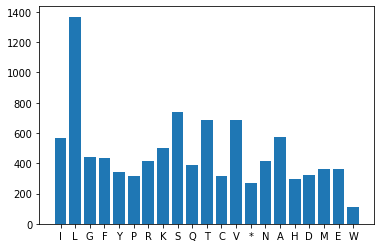

In [60]:
import matplotlib.pyplot as plt#grafico de de fecuencia de aminoacidos derl covid


plt.bar(covid_freq.keys(), covid_freq.values())

<BarContainer object of 21 artists>

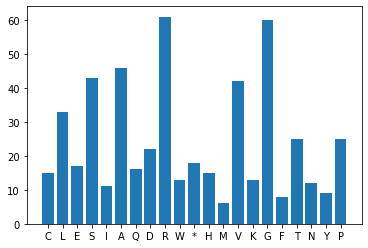

In [61]:
plt.bar(tuberculosis_freq.keys(), tuberculosis_freq.values())

In [63]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment


In [72]:
seq1 = Seq('ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGA')
seq2 = Seq('TGTTTGGAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCTTAACAC')

In [73]:
from Bio.SeqUtils import GC

In [74]:
GC(seq1)


40.74074074074074

In [75]:
GC(seq2)

55.55555555555556

In [76]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [77]:
alignments = pairwise2.align.globalxx(seq1,seq2)

In [78]:
print(alignments)

[Alignment(seqA='ATA-TT---AG-GTTTTT-ACCTACCCAG-GAAAAGC-CA--ACC-AAC-CT--CGAT-C-T-CTTGTAGA---', seqB='-T-GTTTGGAGAG--TTTGA--T--CC--TG----GCTCAGGA-CGAACGCTGGCG--GCGTGC-T-TA-ACAC', score=34.0, start=0, end=74), Alignment(seqA='ATATT---AG-GTTTTT-ACCTACCCAG-GAAAAGC-CA--ACC-AAC-CT--CGAT-C-T-CTTGTAGA---', seqB='-TGTTTGGAGAG--TTTGA--T--CC--TG----GCTCAGGA-CGAACGCTGGCG--GCGTGC-T-TA-ACAC', score=34.0, start=0, end=73), Alignment(seqA='ATA-T-T--AG-GTTTTT-ACCTACCCAG-GAAAAGC-CA--ACC-AAC-CT--CGAT-C-T-CTTGTAGA---', seqB='-T-GTTTGGAGAG--TTTGA--T--CC--TG----GCTCAGGA-CGAACGCTGGCG--GCGTGC-T-TA-ACAC', score=34.0, start=0, end=74), Alignment(seqA='ATAT-T--AG-GTTTTT-ACCTACCCAG-GAAAAGC-CA--ACC-AAC-CT--CGAT-C-T-CTTGTAGA---', seqB='-TGTTTGGAGAG--TTTGA--T--CC--TG----GCTCAGGA-CGAACGCTGGCG--GCGTGC-T-TA-ACAC', score=34.0, start=0, end=73), Alignment(seqA='ATA--TT--AG-GTTTTT-ACCTACCCAG-GAAAAGC-CA--ACC-AAC-CT--CGAT-C-T-CTTGTAGA---', seqB='-T-GTTTGGAGAG--TTTGA--T--CC--TG----GCTCAGGA-CGAACGCTGGCG--GCGTGC-T-TA-ACAC', sco

In [79]:
print(format_alignment(*alignments[0])) #aca tenemos una mejor visualizacion 

ATA-TT---AG-GTTTTT-ACCTACCCAG-GAAAAGC-CA--ACC-AAC-CT--CGAT-C-T-CTTGTAGA---
 |  ||   || |  ||| |  |  ||   |    || ||  | | ||| ||  ||   | | | | || |   
-T-GTTTGGAGAG--TTTGA--T--CC--TG----GCTCAGGA-CGAACGCTGGCG--GCGTGC-T-TA-ACAC
  Score=34



Tipos de alineación Alineación global: encuentra la mejor concordancia / acuerdo entre todos los caracteres en dos secuencias Alineación local: encuentra solo las subsecuencias que se alinean mejor

In [80]:
print(format_alignment(*alignments[1]))#aca vemos la segunda parte

ATATT---AG-GTTTTT-ACCTACCCAG-GAAAAGC-CA--ACC-AAC-CT--CGAT-C-T-CTTGTAGA---
 |.||   || |  ||| |  |  ||   |    || ||  | | ||| ||  ||   | | | | || |   
-TGTTTGGAGAG--TTTGA--T--CC--TG----GCTCAGGA-CGAACGCTGGCG--GCGTGC-T-TA-ACAC
  Score=34



In [82]:
for a in alignments:
    print(format_alignment(*a))#aca vemos la alineacion completa

ATA-TT---AG-GTTTTT-ACCTACCCAG-GAAAAGC-CA--ACC-AAC-CT--CGAT-C-T-CTTGTAGA---
 |  ||   || |  ||| |  |  ||   |    || ||  | | ||| ||  ||   | | | | || |   
-T-GTTTGGAGAG--TTTGA--T--CC--TG----GCTCAGGA-CGAACGCTGGCG--GCGTGC-T-TA-ACAC
  Score=34

ATATT---AG-GTTTTT-ACCTACCCAG-GAAAAGC-CA--ACC-AAC-CT--CGAT-C-T-CTTGTAGA---
 |.||   || |  ||| |  |  ||   |    || ||  | | ||| ||  ||   | | | | || |   
-TGTTTGGAGAG--TTTGA--T--CC--TG----GCTCAGGA-CGAACGCTGGCG--GCGTGC-T-TA-ACAC
  Score=34

ATA-T-T--AG-GTTTTT-ACCTACCCAG-GAAAAGC-CA--ACC-AAC-CT--CGAT-C-T-CTTGTAGA---
 |  | |  || |  ||| |  |  ||   |    || ||  | | ||| ||  ||   | | | | || |   
-T-GTTTGGAGAG--TTTGA--T--CC--TG----GCTCAGGA-CGAACGCTGGCG--GCGTGC-T-TA-ACAC
  Score=34

ATAT-T--AG-GTTTTT-ACCTACCCAG-GAAAAGC-CA--ACC-AAC-CT--CGAT-C-T-CTTGTAGA---
 |.| |  || |  ||| |  |  ||   |    || ||  | | ||| ||  ||   | | | | || |   
-TGTTTGGAGAG--TTTGA--T--CC--TG----GCTCAGGA-CGAACGCTGGCG--GCGTGC-T-TA-ACAC
  Score=34

ATA--TT--AG-GTTTTT-ACCTACCCAG-GAAAAGC-CA--ACC-AAC-CT--CGAT

Obtenemos solo la puntuación para una alineación

In [83]:
alignments2 = pairwise2.align.globalxx(seq1,seq2,one_alignment_only=True,score_only=True)

In [84]:
alignments2

34.0

In [85]:
alignments2/len(seq1)*100

62.96296296296296

Distancia de Hamming: muestra en cuántos lugares difieren 2 cuerdas La distancia de Hamming entre dos cadenas de igual longitud es el número de posiciones en las que los símbolos correspondientes son diferentes. En otras palabras, mide el número mínimo de sustituciones necesarias para cambiar una cadena por otra, o la cantidad mínima de errores que podrían haber transformado una cadena en otra. Se utiliza para la detección o corrección de errores. Se utiliza para cuantificar la similitud de secuencias de ADN, Para comprobar la distancia de edición La distancia de edición es una forma de cuantificar qué tan diferentes son dos cadenas (por ejemplo, palabras) entre sí contando el número mínimo de operaciones necesarias para transformar una cadena en la otra. por ejemplo, distancia de Levenshtein

In [86]:
def hamming_distance(lhs,rhs):
    return len([(x,y) for x,y in zip(lhs,rhs) if x != y])

In [87]:
hamming_distance('ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGA','TGTTTGGAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCTTAACAC')

38

In [88]:
hamming_distance(seq1,seq1[::-1])

32

Gráfica de puntos Un diagrama de puntos es un método gráfico que permite comparar dos secuencias biológicas e identificar regiones de gran similitud entre ellas. El método más simple: coloque un punto donde las secuencias sean idénticas Los gráficos de puntos comparan dos secuencias organizando una secuencia en el eje xy otra en el eje y de un gráfico. Cuando los residuos de ambas secuencias coinciden en la misma ubicación en el gráfico, se dibuja un punto en la posición correspondiente. utilidad Los gráficos de puntos también se pueden utilizar para inspeccionar visualmente secuencias

repeticiones directas o invertidas regiones con baja complejidad de secuencia. Regiones similares Secuencias repetidas Reordenamientos de secuencia Estructuras de ARN Orden de genes Enlace: https: //stackoverflow.com/questions/40822400/how-to-create-a-dotplot-of-two-dna-sequence-in-python

In [89]:
def delta(x,y):
    return 0 if x == y else 1


def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))


def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]


def plotMatrix(M,t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)


def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2) #experiment with character choice

In [90]:
#Hacer un diagrama de puntos secuencia 1 = covid, secuencia 2 = tuberculosis
dotplot(seq1,seq2)

 |TGTTTGGAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCTTAACAC
--------------------------------------------------------
A|       ■ ■     ■         ■  ■  ■■                ■■ ■ 
T|■ ■■■      ■■■  ■  ■   ■            ■       ■  ■■     
A|       ■ ■     ■         ■  ■  ■■                ■■ ■ 
T|■ ■■■      ■■■  ■  ■   ■            ■       ■  ■■     
T|■ ■■■      ■■■  ■  ■   ■            ■       ■  ■■     
A|       ■ ■     ■         ■  ■  ■■                ■■ ■ 
G| ■   ■■ ■ ■   ■     ■■    ■■  ■   ■  ■■ ■■ ■ ■        
G| ■   ■■ ■ ■   ■     ■■    ■■  ■   ■  ■■ ■■ ■ ■        
T|■ ■■■      ■■■  ■  ■   ■            ■       ■  ■■     
T|■ ■■■      ■■■  ■  ■   ■            ■       ■  ■■     
T|■ ■■■      ■■■  ■  ■   ■            ■       ■  ■■     
T|■ ■■■      ■■■  ■  ■   ■            ■       ■  ■■     
T|■ ■■■      ■■■  ■  ■   ■            ■       ■  ■■     
A|       ■ ■     ■         ■  ■  ■■                ■■ ■ 
C|                 ■■   ■ ■    ■   ■ ■   ■  ■   ■    ■ ■
C|                 ■■   ■ ■    

Las proteínas idénticas obviamente tendrán una línea diagonal en el centro de la matriz.

In [91]:
dotplot(Seq('ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGA'),Seq('TGTTTGGAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCTTAACAC'))

 |TGTTTGGAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCTTAACAC
--------------------------------------------------------
A|       ■ ■     ■         ■  ■  ■■                ■■ ■ 
T|■ ■■■      ■■■  ■  ■   ■            ■       ■  ■■     
A|       ■ ■     ■         ■  ■  ■■                ■■ ■ 
T|■ ■■■      ■■■  ■  ■   ■            ■       ■  ■■     
T|■ ■■■      ■■■  ■  ■   ■            ■       ■  ■■     
A|       ■ ■     ■         ■  ■  ■■                ■■ ■ 
G| ■   ■■ ■ ■   ■     ■■    ■■  ■   ■  ■■ ■■ ■ ■        
G| ■   ■■ ■ ■   ■     ■■    ■■  ■   ■  ■■ ■■ ■ ■        
T|■ ■■■      ■■■  ■  ■   ■            ■       ■  ■■     
T|■ ■■■      ■■■  ■  ■   ■            ■       ■  ■■     
T|■ ■■■      ■■■  ■  ■   ■            ■       ■  ■■     
T|■ ■■■      ■■■  ■  ■   ■            ■       ■  ■■     
T|■ ■■■      ■■■  ■  ■   ■            ■       ■  ■■     
A|       ■ ■     ■         ■  ■  ■■                ■■ ■ 
C|                 ■■   ■ ■    ■   ■ ■   ■  ■   ■    ■ ■
C|                 ■■   ■ ■    

In [92]:
import numpy as np
import matplotlib.pyplot as plt
# aqui agregare colore pra mejor visualizacion pero las similitudes estan a ala vista

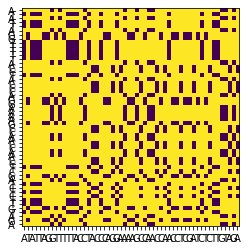

In [93]:
plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
xt=plt.xticks(np.arange(len(list(seq1))),list(seq1))
yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
plt.show()

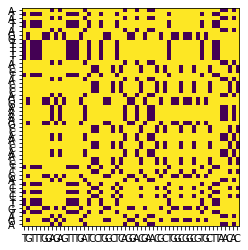

In [94]:
plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
plt.show()

In [98]:
covid_n_tuberculosis = pairwise2.align.globalxx(covid_seq[0:100],tuberculosis_seq[0:100],one_alignment_only=True,score_only=True)

In [99]:
# porcentaje de similitus entre covid y tuberculosis es de un 63.0 % 
covid_n_tuberculosis/len(covid_seq[0:100]) * 100

63.0

CONCLUSION:

La teoria Alemana sobre la similitud del virus covid a una bacteria. esta comprobado en un 63 % en este caso con la bacteria de la tuberculosis.la base de datos de secuencia ha sido extraida del National Center for Biotechnology Information (NCBI) WWW.NCBI.CL
Search database SE ADJUNTARA INFORMACION ADICIONAL.ESTE TRABAJO ES DE PROPIEDAD DE : JUAN ALEJANDRO CUEVAS VASQUEZ.CREADA SOBRE LA NUBE DE GOOGLE. LENGUAJE PYTHON....SALUDOS.

INFORMACION ADICIONAL SOBRE LA BACTERIA


LOCUS       NR_102810               1532 bp    rRNA    linear   BCT 12-MAR-2019
DEFINITION  Mycobacterium tuberculosis H37Rv 16S ribosomal RNA, complete
            sequence.
ACCESSION   NR_102810
VERSION     NR_102810.2
DBLINK      Project: 33175
            BioProject: PRJNA33175
KEYWORDS    RefSeq.
SOURCE      Mycobacterium tuberculosis H37Rv
  ORGANISM  Mycobacterium tuberculosis H37Rv
            Bacteria; Actinobacteria; Corynebacteriales; Mycobacteriaceae;
            Mycobacterium; Mycobacterium tuberculosis complex.
REFERENCE   1
  AUTHORS   Lew,J.M., Kapopoulou,A., Jones,L.M. and Cole,S.T.
  TITLE     TubercuList--10 years after
  JOURNAL   Tuberculosis (Edinb) 91 (1), 1-7 (2011)
   PUBMED   20980199
REFERENCE   2
  AUTHORS   Camus,J.C., Pryor,M.J., Medigue,C. and Cole,S.T.
  TITLE     Re-annotation of the genome sequence of Mycobacterium tuberculosis
            H37Rv
  JOURNAL   Microbiology (Reading, Engl.) 148 (PT 10), 2967-2973 (2002)
   PUBMED   12368430
REFERENCE   3
  AUTHORS   Cole,S.T., Brosch,R., Parkhill,J., Garnier,T., Churcher,C.,
            Harris,D., Gordon,S.V., Eiglmeier,K., Gas,S., Barry,C.E. III,
            Tekaia,F., Badcock,K., Basham,D., Brown,D., Chillingworth,T.,
            Connor,R., Davies,R., Devlin,K., Feltwell,T., Gentles,S.,
            Hamlin,N., Holroyd,S., Hornsby,T., Jagels,K., Krogh,A., McLean,J.,
            Moule,S., Murphy,L., Oliver,K., Osborne,J., Quail,M.A.,
            Rajandream,M.A., Rogers,J., Rutter,S., Seeger,K., Skelton,J.,
            Squares,R., Squares,S., Sulston,J.E., Taylor,K., Whitehead,S. and
            Barrell,B.G.
  TITLE     Deciphering the biology of Mycobacterium tuberculosis from the
            complete genome sequence
  JOURNAL   Nature 393 (6685), 537-544 (1998)
   PUBMED   9634230
  REMARK    Erratum:[Nature 1998 Nov 12;396(6707):190]
REFERENCE   4  (bases 1 to 1532)
  CONSRTM   NCBI RefSeq Targeted Loci Project
  TITLE     Direct Submission
  JOURNAL   Submitted (09-MAY-2013) National Center for Biotechnology
            Information, NIH, Bethesda, MD 20894, USA
REFERENCE   5  (bases 1 to 1532)
  AUTHORS   Lew,J.M.
  TITLE     Direct Submission
  JOURNAL   Submitted (18-DEC-2012) Lew J., Ecole Polytechnique Federale de
            Lausanne, CH-1015, Lausanne, Switzerland, and the Swiss Institute
            of Bioinformatics, CMU - Rue Michel-Servet 1, 1211 Geneva 4,
            SWITZERLAND
REFERENCE   6  (bases 1 to 1532)
  AUTHORS   Parkhill,J.
  TITLE     Direct Submission
  JOURNAL   Submitted (11-JUN-1998) Submitted on behalf of the Mycobacterium
            tuberculosis sequencing and mapping teams, Sanger Centre, Wellcome
            Trust Genome Campus, Hinxton, Cambridge CB10 1SA Unite de Genetique
            Moleculaire Bacterienne, Institut Pasteur, 28 rue du Docteur Roux,
            75724 Paris Cedex 15, France E-mail: parkhill@sanger.ac.uk
COMMENT     REVIEWED REFSEQ: This record has been curated by NCBI staff. The
            reference sequence was derived from AL123456.
            On Oct 25, 2017 this sequence version replaced NR_102810.1.
FEATURES             Location/Qualifiers
     source          1..1532
                     /organism="Mycobacterium tuberculosis H37Rv"
                     /mol_type="rRNA"
                     /strain="H37Rv"
                     /culture_collection="ATCC:27294"
                     /type_material="type strain of Mycobacterium tuberculosis"
                     /db_xref="taxon:83332"
     rRNA            1..1532
                     /product="16S ribosomal RNA"
ORIGIN      
        1 tgtttggaga gtttgatcct ggctcaggac gaacgctggc ggcgtgctta acacatgcaa
       61 gtcgaacgga aaggtctctt cggagatact cgagtggcga acgggtgagt aacacgtggg
      121 tgatctgccc tgcacttcgg gataagcctg ggaaactggg tctaataccg gataggacca
      181 cgggatgcat gtcttgtggt ggaaagcgct ttagcggtgt gggatgagcc cgcggcctat
      241 cagcttgttg gtggggtgac ggcctaccaa ggcgacgacg ggtagccggc ctgagagggt
      301 gtccggccac actgggactg agatacggcc cagactccta cgggaggcag cagtggggaa
      361 tattgcacaa tgggcgcaag cctgatgcag cgacgccgcg tgggggatga cggccttcgg
      421 gttgtaaacc tctttcacca tcgacgaagg tccgggttct ctcggattga cggtaggtgg
      481 agaagaagca ccggccaact acgtgccagc agccgcggta atacgtaggg tgcgagcgtt
      541 gtccggaatt actgggcgta aagagctcgt aggtggtttg tcgcgttgtt cgtgaaatct
      601 cacggcttaa ctgtgagcgt gcgggcgata cgggcagact agagtactgc aggggagact
      661 ggaattcctg gtgtagcggt ggaatgcgca gatatcagga ggaacaccgg tggcgaaggc
      721 gggtctctgg gcagtaactg acgctgagga gcgaaagcgt ggggagcgaa caggattaga
      781 taccctggta gtccacgccg taaacggtgg gtactaggtg tgggtttcct tccttgggat
      841 ccgtgccgta gctaacgcat taagtacccc gcctggggag tacggccgca aggctaaaac
      901 tcaaaggaat tgacgggggc ccgcacaagc ggcggagcat gtggattaat tcgatgcaac
      961 gcgaagaacc ttacctgggt ttgacatgca caggacgcgt ctagagatag gcgttccctt
     1021 gtggcctgtg tgcaggtggt gcatggctgt cgtcagctcg tgtcgtgaga tgttgggtta
     1081 agtcccgcaa cgagcgcaac ccttgtctca tgttgccagc acgtaatggt ggggactcgt
     1141 gagagactgc cggggtcaac tcggaggaag gtggggatga cgtcaagtca tcatgcccct
     1201 tatgtccagg gcttcacaca tgctacaatg gccggtacaa agggctgcga tgccgcgagg
     1261 ttaagcgaat ccttaaaagc cggtctcagt tcggatcggg gtctgcaact cgaccccgtg
     1321 aagtcggagt cgctagtaat cgcagatcag caacgctgcg gtgaatacgt tcccgggcct
     1381 tgtacacacc gcccgtcacg tcatgaaagt cggtaacacc cgaagccagt ggcctaaccc
     1441 tcgggaggga gctgtcgaag gtgggatcgg cgattgggac gaagtcgtaa caaggtagcc
     1501 gtaccggaag gtgcggctgg atcacctcct tt
//